In [1]:
import pandas as pd 
import numpy as np 
import nltk
df = pd.read_csv(r'Dataset\training_twitter_x_y_train.csv')

In [3]:
df.loc[df['airline_sentiment'] == 'negative','airline_sentiment'] = int(0)
df.loc[df['airline_sentiment'] == 'positive','airline_sentiment'] = int(1)
df.loc[df['airline_sentiment'] == 'neutral','airline_sentiment'] = int(2)
df.head(5)

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,0,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,1,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,1,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,0,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,0,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [5]:
df = df[['text','airline_sentiment']]
data = df.to_numpy()
data[:5]

array([['@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
        0],
       ['@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
        1],
       ['@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
        1],
       ["@SouthwestAir @dultch97 that's horse radish 😤🐴", 0],
       ['@united so our flight into ORD was delayed because of Air Force One, but the last flight to SBN is at 8:20, 5 mins from now we just landed.',
        0]], dtype=object)

In [6]:
x = data[:,0]
y = data[:,1]

In [7]:
from nltk.corpus import stopwords
import re
stops = stopwords.words('english')

In [8]:
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
def get_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [10]:
dict = {}
for i in range(len(x)):
    txt = x[i].lower()
    sen = re.split(r'\W+',txt)
    for w in sen:
        if not(w.isalpha()) or (len(w)<=1):
            continue
        pos = pos_tag([w])
        main_word = lem.lemmatize(w,get_pos(pos[0][1]))
        if main_word in dict:
            dict[main_word]+=1
        else:
            dict[main_word]=1
dict.items()

dict_items([('southwestair', 1844), ('be', 6357), ('schedule', 72), ('for', 3016), ('the', 4497), ('morning', 127), ('day', 414), ('after', 352), ('fact', 24), ('yes', 186), ('not', 1189), ('sure', 131), ('why', 445), ('my', 2458), ('even', 238), ('flight', 3619), ('only', 261), ('one', 447), ('cancel', 803), ('flightled', 380), ('see', 238), ('your', 1289), ('worker', 10), ('time', 715), ('in', 1903), ('and', 2763), ('out', 529), ('go', 558), ('above', 11), ('beyond', 30), ('love', 210), ('fly', 528), ('with', 1148), ('you', 3332), ('guy', 310), ('thank', 479), ('united', 3185), ('flew', 35), ('ord', 90), ('to', 6478), ('miami', 39), ('back', 407), ('have', 2073), ('great', 257), ('crew', 176), ('service', 752), ('on', 2850), ('both', 53), ('leg', 38), ('thanks', 833), ('that', 1285), ('horse', 2), ('radish', 1), ('so', 698), ('our', 508), ('into', 124), ('delayed', 396), ('because', 234), ('of', 1587), ('air', 104), ('force', 31), ('but', 953), ('last', 220), ('sbn', 1), ('at', 1114)

In [11]:
dct2 = {i:j for i,j in sorted(dict.items(), key = lambda item:item[1], reverse = True )}
dct2.items()

dict_items([('to', 6478), ('be', 6357), ('the', 4497), ('flight', 3619), ('you', 3332), ('united', 3185), ('for', 3016), ('on', 2850), ('and', 2763), ('my', 2458), ('usairways', 2256), ('americanair', 2236), ('have', 2073), ('in', 1903), ('it', 1898), ('southwestair', 1844), ('jetblue', 1764), ('of', 1587), ('get', 1569), ('me', 1458), ('your', 1289), ('that', 1285), ('can', 1268), ('do', 1250), ('not', 1189), ('with', 1148), ('no', 1139), ('at', 1114), ('this', 1031), ('we', 975), ('but', 953), ('co', 910), ('http', 906), ('from', 905), ('hour', 884), ('thanks', 833), ('cancel', 803), ('now', 779), ('service', 752), ('just', 741), ('help', 736), ('an', 722), ('time', 715), ('customer', 710), ('so', 698), ('what', 618), ('call', 605), ('they', 582), ('bag', 576), ('wait', 565), ('go', 558), ('up', 558), ('will', 553), ('plane', 548), ('out', 529), ('make', 529), ('fly', 528), ('need', 514), ('amp', 511), ('hold', 511), ('our', 508), ('how', 499), ('there', 499), ('u', 495), ('when', 49

[6478 6357 4497 ...    1    1    1]
8543


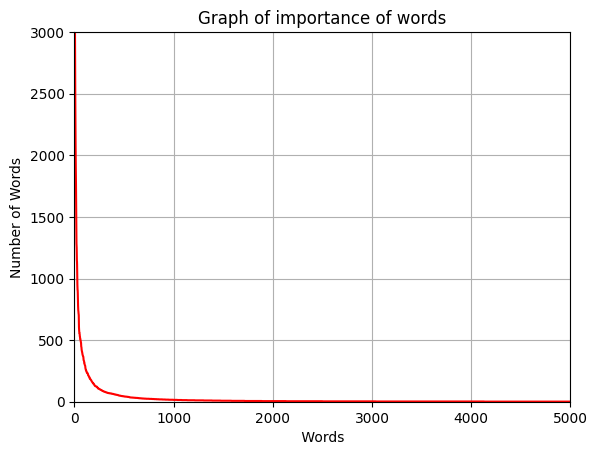

In [12]:
import matplotlib.pyplot as plt
num_of_words = np.array(list(dct2.values()))
print(num_of_words)
words = np.arange(0,len(num_of_words),1)
print(len(words))
plt.plot(words,num_of_words,color = 'red')
plt.grid(True)
plt.xlabel(" Words ",color = 'black')
plt.ylabel("Number of Words",color = 'black')
plt.axis([0,5000,0,3000])
plt.title("Graph of importance of words")
plt.show()

In [13]:
seq_dct = {'NaN':8000}
temp = 0
for i in dct2.keys():
    seq_dct[i] = temp
    temp += 1
    if temp == 8000:
        break
seq_dct.items()

dict_items([('NaN', 8000), ('to', 0), ('be', 1), ('the', 2), ('flight', 3), ('you', 4), ('united', 5), ('for', 6), ('on', 7), ('and', 8), ('my', 9), ('usairways', 10), ('americanair', 11), ('have', 12), ('in', 13), ('it', 14), ('southwestair', 15), ('jetblue', 16), ('of', 17), ('get', 18), ('me', 19), ('your', 20), ('that', 21), ('can', 22), ('do', 23), ('not', 24), ('with', 25), ('no', 26), ('at', 27), ('this', 28), ('we', 29), ('but', 30), ('co', 31), ('http', 32), ('from', 33), ('hour', 34), ('thanks', 35), ('cancel', 36), ('now', 37), ('service', 38), ('just', 39), ('help', 40), ('an', 41), ('time', 42), ('customer', 43), ('so', 44), ('what', 45), ('call', 46), ('they', 47), ('bag', 48), ('wait', 49), ('go', 50), ('up', 51), ('will', 52), ('plane', 53), ('out', 54), ('make', 55), ('fly', 56), ('need', 57), ('amp', 58), ('hold', 59), ('our', 60), ('how', 61), ('there', 62), ('u', 63), ('when', 64), ('all', 65), ('thank', 66), ('if', 67), ('still', 68), ('one', 69), ('why', 70), ('tr

In [14]:
x[:10]

array(['@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
       '@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
       '@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
       "@SouthwestAir @dultch97 that's horse radish 😤🐴",
       '@united so our flight into ORD was delayed because of Air Force One, but the last flight to SBN is at 8:20, 5 mins from now we just landed.',
       '@united Why did you load us in this flying sardine can if you knew the pilots were 2 hours Late Flight?? #incompetent beyond belief',
       "@JetBlue that is a stock response. Delays not as frustrating as poor cust serv &amp; being told by 3 ppl to wait &amp; they'd come back but did not.",
       "@JetBlue That'd be nice! Hoping to rack up enough miles to take a trip to Seattle and enjoy a perfect 

In [15]:
def padding(x_temp,pad_size):
    if len(x_temp) >= pad_size:
        return x_temp[:pad_size]
    else:
        for i in range(pad_size-len(x_temp)):
            x_temp.append(8000)
        return x_temp

In [16]:
# defining a function to make a data set
def make_dataset(x,seq_dct,pad_size):
    x_train_test = []
    for i in range(len(x)):
        txt = x[i].lower()
        sen = re.split(r'\W+',txt)
        x_temp = []
        for w in sen:
            if w in seq_dct:
                x_temp.append(seq_dct[w])
        x_seq = padding(x_temp,pad_size)
        x_train_test.append(x_seq)
    return x_train_test
            
x_new = make_dataset(x,seq_dct,50)
x_new = np.array(x_new)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,shuffle=True)

In [29]:
import tensorflow as tf 
tf.compat.v1.disable_eager_execution()
y_train2 = tf.keras.utils.to_categorical(y_train,3)
y_test2 = tf.keras.utils.to_categorical(y_test,3)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
model = Sequential()
model.add(Embedding(input_dim=8001, output_dim=50, input_length=50))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=500,return_sequences=True)))
model.add(Bidirectional(LSTM(units=250)))
model.add(Dropout(0.15))
model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=250,activation='tanh'))
model.add(Dropout(0.05))
model.add(Dense(units=3,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            400050    
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 50, 1000)         2204000   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 500)              2502000   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense (Dense)               (None, 500)               2

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
x_train.shape , x_test.shape

((8235, 50), (2745, 50))

In [23]:
model.fit(x_train,y_train2,epochs=25,batch_size=300)

Train on 8235 samples
Epoch 1/25
8235/8235 [==============================] - 15s 2ms/sample - loss: 0.5554 - accuracy: 0.7378
Epoch 2/25
8235/8235 [==============================] - 11s 1ms/sample - loss: 0.4143 - accuracy: 0.8070
Epoch 3/25
8235/8235 [==============================] - 13s 2ms/sample - loss: 0.3255 - accuracy: 0.8523
Epoch 4/25
8235/8235 [==============================] - 15s 2ms/sample - loss: 0.2640 - accuracy: 0.8897
Epoch 5/25
8235/8235 [==============================] - 15s 2ms/sample - loss: 0.2187 - accuracy: 0.9134
Epoch 6/25
8235/8235 [==============================] - 14s 2ms/sample - loss: 0.1920 - accuracy: 0.9252
Epoch 7/25
8235/8235 [==============================] - 15s 2ms/sample - loss: 0.1588 - accuracy: 0.9389
Epoch 8/25
8235/8235 [==============================] - 13s 2ms/sample - loss: 0.1423 - accuracy: 0.9475
Epoch 9/25
8235/8235 [==============================] - 15s 2ms/sample - loss: 0.1396 - accuracy: 0.9471
Epoch 10/25
8235/8235 [==========

In [32]:
result_train = model.evaluate(x_train,y_train2)
result_train

[0.2095440888081852, 0.9471769]

In [33]:
result_test = model.evaluate(x_test,y_test2)
result_test

[0.20130881503468653, 0.94936264]

In [35]:
print('Train data accuracy - ',result_train[1]*100,'%')
print('Test data accuracy - ',result_test[1]*100,'%')

Train data accuracy -  94.71768736839294 %
Test data accuracy -  94.93626356124878 %


In [37]:
model.save_weights('weights_bidirectional.h5')